In [1]:
from cleaning_module import clean_translate_reviews, clean_water_quality, clean_weather
from analysis_module import calculate_amenity_scores, compute_sentiment_scores
import pandas as pd
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Reviews text cleaning and translate**

In [2]:
'''
input_file = 'row_data/reviews/reviews.csv'
urls_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
deepl_api_key = '631651fd-82bc-eca9-21cc-4861fe0a7a8f:fx' # From Xiao

clean_translate_reviews(input_file, urls_file, output_file, deepl_api_key)
'''

# Will need 1h to run, do not run again unless necessary

"\ninput_file = 'row_data/reviews/reviews.csv'\nurls_file = 'row_data/reviews/urls.csv'\noutput_file = 'processed_data/reviews/reviews_cleaned_translated.csv'\ndeepl_api_key = '631651fd-82bc-eca9-21cc-4861fe0a7a8f:fx' # From Xiao\n\nclean_translate_reviews(input_file, urls_file, output_file, deepl_api_key)\n"

In [3]:
reviews = pd.read_csv('processed_data/reviews/reviews_cleaned_translated.csv').dropna(subset=['Translated_Review'])

print(len(reviews))
reviews.head()

3547


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_questions_Kid-friendliness,review_questions_Dietary restrictions,review_questions_Parking space,review_questions_Parking options,review_questions_Parking,Location_Unique,Status,Lat,Long,Translated_Review
2,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURaOTRXNUNREAE,CAESBkVnSUlBdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Beautiful park, very quiet"
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Polecam
6,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSUNadHBxZEJBEAE,CAESBkVnSUlCdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Beautiful area of Amsterdam. Near Krainnest an...
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Lovely Lake
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Home, the lake is full of beaches, perfect for..."


**Water quality data cleaning**

In [4]:
input_file = 'row_data/water_quality/Amsterdam2007-2023_utf-8.csv'
output_file = 'processed_data/water_quality/water_quality_cleaned.csv'

clean_water_quality(input_file, output_file)

c:\Users\sebgr\OneDrive\Desktop\Uni\UvA\CSSci Semester3\GroupProject\Urban-2\fianl_data_analysis\cleaning_module.py:104: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Cleaned data saved to processed_data/water_quality/water_quality_cleaned.csv


In [5]:
water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

water_quality.head()

C:\Users\sebgr\AppData\Local\Temp\ipykernel_17664\1820173234.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


,locatiecode,locatie omschrijving,locatie x,locatie y,locatie z,compartiment,datum,fewsparameter,fewsparametercode,fewsparameternaam,...,fewsparameterparameterfractie,limietsymbool,meetwaarde,eenheid,waardebewerkingsmethode,afronding,opmerkingmeting,date,lat,lon
0,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,6.4,mg/l,MET,Ja,NaN,2007-01-03,52.321946,5.030963
1,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_%,O2,Zuurstofverzadigingspercentage,...,NaN,NaN,49.0,%,MET,Ja,NaN,2007-01-03,52.321946,5.030963
2,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,T_oC,T,Temperatuur (oC),...,NaN,NaN,4.5,oC,MET,Ja,NaN,2007-01-03,52.321946,5.030963
3,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,ZICHT_m,ZICHT,Doorzicht (m),...,NaN,>,0.2,m,MET,Ja,NaN,2007-01-03,52.321946,5.030963
4,BGP010,In bak achter benzinestation aflaat stedelijk ...,131455,480719,NaN,OW,3-1-2007 08:30,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,3.1,mg/l,MET,Ja,NaN,2007-01-03,52.313926,5.041924


In [6]:
unique_indicator_types = water_quality['fewsparameter'].unique()
unique_indicator_count = len(unique_indicator_types)
unique_indicator_types_list = unique_indicator_types.tolist()

unique_indicator_count, unique_indicator_types_list

(8,
 ['O2_mg/l',
  'O2_%',
  'T_oC',
  'ZICHT_m',
  'INTTNLETRCCN_nKVE/dl',
  'E_COLI_nKVE/dl',
  'BADGT_n',
  'CHLFa_ug/l_blauwalg'])

**Weather data cleaning**

In [7]:
input_file = 'row_data/weather/schiphol_KNMI_weather_data_2007_2023.txt'
output_file = 'processed_data/weather/weather_cleaned.csv'

clean_weather(input_file, output_file)

Cleaned data saved to processed_data/weather/weather_cleaned.csv


In [8]:
weather = pd.read_csv('processed_data/weather/weather_cleaned.csv')

weather.head()

'''
FG: Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s)
TG: Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
SQ: Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global 
DR: Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
RH: Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
PG: Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) 
UG: Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)
EV24: Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)
'''

'\nFG: Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s)\nTG: Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)\nSQ: Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global \nDR: Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)\nRH: Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)\nPG: Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) \nUG: Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)\nEV24: Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)\n'

**Convert OSM data to amenities score**

In [9]:
input_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/amenities_score/amenities_score.csv'
data_folder = 'row_data/OSM/output_OSM_data'

calculate_amenity_scores(input_file, output_file, data_folder)

Amenity scores saved to: processed_data/amenities_score/amenities_score.csv


In [10]:
amenities_score = pd.read_csv('processed_data/amenities_score/amenities_score.csv')

amenities_score.head()

,Location,Amenities_Score,Normalized_Amenities_Score
0,Gaasperplas,5,0.36
1,Gaasperplas strand,4,0.29
2,Playground Gaasperplaspark,7,0.50
3,Waterspeelplaats Gaasperpark,7,0.50
4,Park de Oeverlanden,4,0.29


**Get sentiment score from reviews**

In [11]:
input_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
output_file = 'processed_data/sentiment_score/reviews_sentiment_score.csv'

compute_sentiment_scores(input_file, output_file)

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\sebgr/nltk_data'
    - 'c:\\Users\\sebgr\\anaconda3\\envs\\AsiaINReview\\nltk_data'
    - 'c:\\Users\\sebgr\\anaconda3\\envs\\AsiaINReview\\share\\nltk_data'
    - 'c:\\Users\\sebgr\\anaconda3\\envs\\AsiaINReview\\lib\\nltk_data'
    - 'C:\\Users\\sebgr\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
sentiment_score = pd.read_csv('processed_data/sentiment_score/reviews_sentiment_score.csv').dropna(subset=['Sentiment_Score'])
sentiment_score = sentiment_score[['name', 'Location_Unique', 'review_datetime_utc', 'Translated_Review', 'Sentiment_Score']]

sentiment_score.head()


,name,Location_Unique,review_datetime_utc,Translated_Review,Sentiment_Score
2,Gaasperplas,Gaasperplas,2023-10-08,"Beautiful park, very quiet",0.5994
3,Gaasperplas,Gaasperplas,2023-09-20,Polecam,0.0000
6,Gaasperplas,Gaasperplas,2023-09-10,Beautiful area of Amsterdam. Near Krainnest an...,0.7717
8,Gaasperplas,Gaasperplas,2023-08-22,Lovely Lake,0.5859
10,Gaasperplas,Gaasperplas,2023-08-07,"Home, the lake is full of beaches, perfect for...",0.5719


**Datasets linkage**

Link sentiment score with water quality

In [ ]:
'''
reviews_sentiment_score_df = pd.read_csv(r'processed_data/sentiment_score/reviews_sentiment_score.csv')
water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

# Get unique items from 'fewsparameter'
unique_parameters = water_quality_df['fewsparameter'].unique()

# Initialize new columns in the reviews sentiment score dataframe
for param in unique_parameters:
    reviews_sentiment_score_df[param] = None

# Haversine_distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the earth.
    
    :param lat1: Latitude of the first point.
    :param lon1: Longitude of the first point.
    :param lat2: Latitude of the second point.
    :param lon2: Longitude of the second point.
    :return: Distance in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

# Function to merge data
def merge_data(reviews_df, water_quality_df, radius=1):
    total_reviews = len(reviews_df)
    last_printed_percent = 0
    
    for index1, row1 in reviews_df.iterrows():
        closest_distance = float('inf')
        closest_water_quality = None

        for index2, row2 in water_quality_df.iterrows():
            if row1['review_datetime_utc'] == row2['date']:
                distance = haversine_distance(row1['Lat'], row1['Long'], row2['lat'], row2['lon'])
                if distance <= radius and distance < closest_distance:
                    closest_distance = distance
                    closest_water_quality = row2

        if closest_water_quality is not None:
            for param in unique_parameters:
                matching_param_value = water_quality_df.loc[
                    (water_quality_df['date'] == closest_water_quality['date']) &
                    (water_quality_df['lat'] == closest_water_quality['lat']) &
                    (water_quality_df['lon'] == closest_water_quality['lon']) &
                    (water_quality_df['fewsparameter'] == param), 'meetwaarde'
                ]
                if not matching_param_value.empty:
                    reviews_df.at[index1, param] = matching_param_value.iloc[0]

        # Overall review progress update
        percent_complete = (index1 + 1) / total_reviews * 100

        if percent_complete - last_printed_percent >= 0.5:
            reviews_left = total_reviews - (index1 + 1)
            print(f"Review progress: Processed {index1 + 1}/{total_reviews} reviews. "
                  f"{reviews_left} reviews left ({percent_complete:.2f}% complete).")
            last_printed_percent = percent_complete

    return reviews_df

merged_df = merge_data(reviews_sentiment_score_df, water_quality_df)

merged_df.to_csv('merged_data/water_sentiment.csv', index=False)
'''

# Will need 3h to run, do not run again unless necessary

/var/folders/l2/6k2cs13d16xfb7mrzcmwrcv40000gn/T/ipykernel_29770/4225307395.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


Review progress: Processed 42/8286 reviews. 8244 reviews left (0.51% complete).
Review progress: Processed 84/8286 reviews. 8202 reviews left (1.01% complete).
Review progress: Processed 126/8286 reviews. 8160 reviews left (1.52% complete).
Review progress: Processed 168/8286 reviews. 8118 reviews left (2.03% complete).
Review progress: Processed 210/8286 reviews. 8076 reviews left (2.53% complete).
Review progress: Processed 252/8286 reviews. 8034 reviews left (3.04% complete).
Review progress: Processed 294/8286 reviews. 7992 reviews left (3.55% complete).
Review progress: Processed 336/8286 reviews. 7950 reviews left (4.06% complete).
Review progress: Processed 378/8286 reviews. 7908 reviews left (4.56% complete).
Review progress: Processed 420/8286 reviews. 7866 reviews left (5.07% complete).
Review progress: Processed 462/8286 reviews. 7824 reviews left (5.58% complete).
Review progress: Processed 504/8286 reviews. 7782 reviews left (6.08% complete).
Review progress: Processed 546

In [ ]:
water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')

e_coli = water_sentiment.dropna(subset=['E_COLI_nKVE/dl'])

print(len(e_coli))
e_coli.head()

266


C:\Users\kalei\AppData\Local\Temp\ipykernel_44524\533866176.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,Cleaned_Review,Sentiment_Score,O2_mg/l,O2_%,T_oC,ZICHT_m,INTTNLETRCCN_nKVE/dl,E_COLI_nKVE/dl,BADGT_n,CHLFa_ug/l_blauwalg
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,polecam,0.0000,NaN,NaN,18.4,1.0,390.0,440.0,0.0,NaN
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,lovely lake,0.5859,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
9,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNjMzdTdnJ3RRAB,CAESBkVnSUlDZw==,...,NaN,NaN,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,"home, the lake is full of beaches, perfect for...",0.5719,NaN,NaN,18.0,1.0,60.0,350.0,0.0,2.0
72,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURLN2NPT0FREAE,CAESBkVnSUlTUQ==,...,NaN,NaN,NaN,NaN,13.6,0.3,410.0,140.0,0.0,NaN


**Merge weather and amenities scores with water quality and sentiment**

In [12]:
merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')
weather_df = pd.read_csv('processed_data\weather\weather_cleaned.csv')
amenities_score_df = pd.read_csv(r'processed_data\amenities_score\amenities_score.csv')

total_reviews = len(merged_water_sentiment_df)
percent_interval = 10
next_percent_threshold = percent_interval

# Merge with Weather Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_weather = weather_df[weather_df['date'] == row['review_datetime_utc']]
    if not matching_weather.empty:
        for col in weather_df.columns:
            if col != 'date':
                merged_water_sentiment_df.at[index, col] = matching_weather.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Weather merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval
        
next_percent_threshold = percent_interval

# Merge with Amenities Score Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_amenity = amenities_score_df[amenities_score_df['Location'] == row['name']]
    if not matching_amenity.empty:
        for col in amenities_score_df.columns:
            if col != 'Location':
                merged_water_sentiment_df.at[index, col] = matching_amenity.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Amenities score merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval

merged_water_sentiment_df.to_csv('merged_data\merged_all.csv', index=False)

C:\Users\sebgr\AppData\Local\Temp\ipykernel_17664\2553892588.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')


Weather merging progress: Processed 829/8286 reviews. 7457 reviews left (10.00% complete).
Weather merging progress: Processed 1658/8286 reviews. 6628 reviews left (20.01% complete).
Weather merging progress: Processed 2486/8286 reviews. 5800 reviews left (30.00% complete).
Weather merging progress: Processed 3315/8286 reviews. 4971 reviews left (40.01% complete).
Weather merging progress: Processed 4143/8286 reviews. 4143 reviews left (50.00% complete).
Weather merging progress: Processed 4972/8286 reviews. 3314 reviews left (60.00% complete).
Weather merging progress: Processed 5801/8286 reviews. 2485 reviews left (70.01% complete).
Weather merging progress: Processed 6629/8286 reviews. 1657 reviews left (80.00% complete).
Weather merging progress: Processed 7458/8286 reviews. 828 reviews left (90.01% complete).
Weather merging progress: Processed 8286/8286 reviews. 0 reviews left (100.00% complete).
Amenities score merging progress: Processed 829/8286 reviews. 7457 reviews left (10.

**Data preparation for machine learning**

In [13]:
merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])

columns_to_drop = ['query', 'google_id', 'place_id', 'location_link', 'reviews_link', 'rating', 
                   'review_id', 'review_pagination_id', 'author_link', 'author_title', 'author_id',
                   'author_image', 'review_text', 'review_img_url', 'review_img_urls', 'review_questions',
                   'review_photo_ids', 'owner_answer', 'owner_answer_timestamp', 
                   'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating', 'review_timestamp', 
                   'review_likes', 'reviews_id', 'reviews_per_score_1', 'reviews_per_score_2', 
                   'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5', 'reviews_per_score', 
                   'review_questions_Playground', 'review_questions_Restrooms', 'review_questions_Dog-friendliness', 
                   'review_questions_Picnic area', 'review_questions_None', 'review_questions_Features', 
                   'review_questions_Meal type', 'review_questions_Price per person', 'review_questions_Food', 
                   'review_questions_Service', 'review_questions_Atmosphere', 'review_questions_Recommended dishes', 
                   'review_questions_Vegetarian options', 'review_questions_Kid-friendliness', 'review_questions_Dietary restrictions',
                   'review_questions_Parking space', 'review_questions_Parking options', 'review_questions_Parking', 'Cleaned_Review', 
                   'BADGT_n', 'PG', 'UG', 'EV24']

merged_all_cleaned = merged_all.drop(columns=columns_to_drop)

merged_all_cleaned.to_csv('merged_data\merged_all_cleaned.csv', index=False)

C:\Users\sebgr\AppData\Local\Temp\ipykernel_17664\2595295055.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])


Impute missing values

In [14]:
data = pd.read_csv('merged_data/merged_all_cleaned.csv')

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols = categorical_cols.drop('name')

# Impute NA in numeric columns
iterative_imputer = IterativeImputer(random_state=0)
numeric_data_for_imputation = data[numeric_cols]
imputed_numeric_data = iterative_imputer.fit_transform(numeric_data_for_imputation)

imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Fill missing values with a placeholder and convert categories to numbers
data[categorical_cols] = data[categorical_cols].fillna('missing')
for col in categorical_cols:
    data[col] = OrdinalEncoder().fit_transform(data[[col]])

# Combine the data back together
final_imputed_df = pd.concat([imputed_numeric_df, data[categorical_cols], data['name'].reset_index(drop=True)], axis=1)

final_imputed_df.to_csv('imputed_data/clustering_imputed_data.csv', index=False)

Clustering

In [24]:
data = pd.read_csv('imputed_data/clustering_imputed_data.csv')
data.groupby(["name"]).median().reset_index()

,name,reviews,Lat,Long,Sentiment_Score,O2_mg/l,O2_%,T_oC,ZICHT_m,INTTNLETRCCN_nKVE/dl,...,TG,SQ,DR,RH,Amenities_Score,Normalized_Amenities_Score,review_datetime_utc,Location_Unique,Status,Translated_Review
0,Bogortuin,23.0,52.376726,4.934715,0.55630,7.678878,77.899435,17.356519,1.047454,203.579205,...,17.20,8.10,0.00,0.00,6.0,0.43,1295.0,0.0,1.0,1390.0
1,Buitenzwembad Marineterrein - Outdoor canal sw...,51.0,52.372857,4.914531,0.65970,7.689217,77.372584,17.730286,1.050251,201.809200,...,17.20,8.20,0.00,0.00,6.0,0.43,1281.0,6.0,1.0,1395.0
2,De Ceuvel,1973.0,52.392212,4.903736,0.77150,7.489344,77.461910,16.587308,1.578530,83.130879,...,14.70,5.80,0.00,0.00,2.0,0.14,640.5,1.0,1.0,1673.0
3,Erasmuspark,855.0,52.376542,4.844867,0.59830,7.893137,77.398111,15.922698,1.266614,152.175733,...,14.55,6.05,0.00,0.00,6.0,0.43,1147.0,3.0,1.0,1716.0
4,Gaasperplas,193.0,52.306924,4.986444,0.59940,8.358943,78.009657,15.250000,1.141606,193.125036,...,13.25,5.00,0.15,0.10,5.0,0.36,871.0,4.0,0.0,1737.0
5,Gaasperplas strand,39.0,52.306096,4.987958,0.63690,7.320926,77.773640,19.200000,1.039307,202.554305,...,17.60,9.80,0.00,0.00,4.0,0.29,1362.0,4.0,0.0,1810.0
6,Kuuma Marineterrein,34.0,52.372857,4.914531,0.88965,9.119828,78.114742,11.314381,1.166086,202.952849,...,6.45,4.40,0.55,0.30,6.0,0.43,1493.0,6.0,1.0,1607.0
7,Ouderkerkerplas,67.0,52.293437,4.926853,0.59940,7.286125,78.549123,18.503204,1.121026,200.883201,...,16.90,7.30,0.00,0.00,1.0,0.07,1206.5,9.0,0.0,1306.5
8,Ouderkerkerplas Strand,272.0,52.292043,4.924618,0.57190,7.096384,78.431103,19.645784,1.153172,188.213292,...,18.20,8.60,0.00,0.00,1.0,0.07,688.0,9.0,0.0,1711.0
9,Park Somerlust,115.0,52.340961,4.915279,0.71840,7.441661,77.532965,18.802155,1.062391,197.874332,...,17.70,9.40,0.00,0.00,6.0,0.43,1413.0,10.0,1.0,1670.0


In [15]:
data = pd.read_csv('imputed_data/imputed_data.csv')

# Exclude irrelevant features
features = data.drop(['Sentiment_Score', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'], axis=1)
target = data['Sentiment_Score']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of k based on the elbow method
k = 9
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_scaled)

clusters = kmeans.labels_

# Assign cluster labels to the data
data['Cluster'] = clusters

# Use PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Add the PCA components for visualization
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette=sns.color_palette('hls', n_colors=k))
plt.title('Cluster Visualization')
plt.show()

numeric_cols_for_analysis = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_for_analysis = numeric_cols_for_analysis.drop(['PC1', 'PC2'])  # Drop the PCA components from analysis

cluster_analysis = data.groupby('Cluster')[numeric_cols_for_analysis].mean()

print(cluster_analysis)

for cluster in sorted(data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(data.loc[data['Cluster'] == cluster, 'name'])
    
data[['name', 'Cluster', 'PC1', 'PC2']].to_csv('clustering_results_with_pca.csv', index=False)

# cluster_analysis.to_csv('cluster_analysis_summary.csv', index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'imputed_data/imputed_data.csv'

Random Forest

In [ ]:
data = pd.read_csv('merged_data/merged_all_cleaned.csv')

data['Status'] = data['Status'].apply(lambda x: 1 if x == 'official' else 0)

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data_numeric = data.drop(columns=['Status', 'reviews', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'])
data_imputed = pd.DataFrame(iterative_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

data_imputed['Status'] = data['Status'].reset_index(drop=True)

data_imputed.to_csv('imputed_data/random_forest_imputed_data.csv', index=False)

data = data_imputed

/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Number of training data points: 2837
Number of testing data points: 710
Mean Squared Error: 0.016979307885454927
Root Mean Squared Error: 0.13030467330627452
Mean Absolute Error: 0.0693228802816901
R-squared: 0.8740778199690281
E_COLI_nKVE/dl                0.637586
O2_mg/l                       0.059441
T_oC                          0.057680
INTTNLETRCCN_nKVE/dl          0.053934
FG                            0.045057
TG                            0.043296
SQ                            0.033173
ZICHT_m                       0.022161
CHLFa_ug/l_blauwalg           0.019402
O2_%                          0.013636
RH                            0.005234
DR                            0.004784
Normalized_Amenities_Score    0.003273
Status                        0.001342
dtype: float64


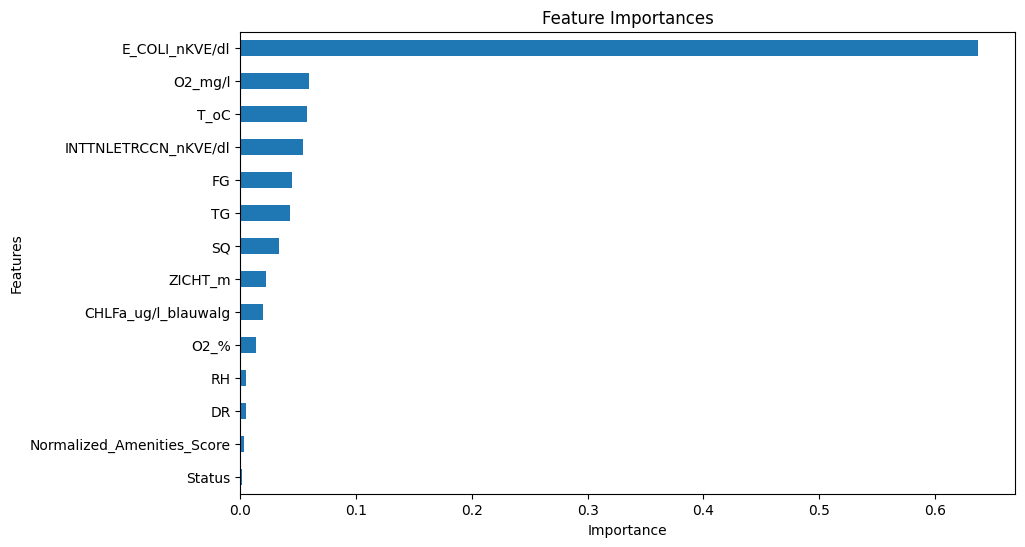

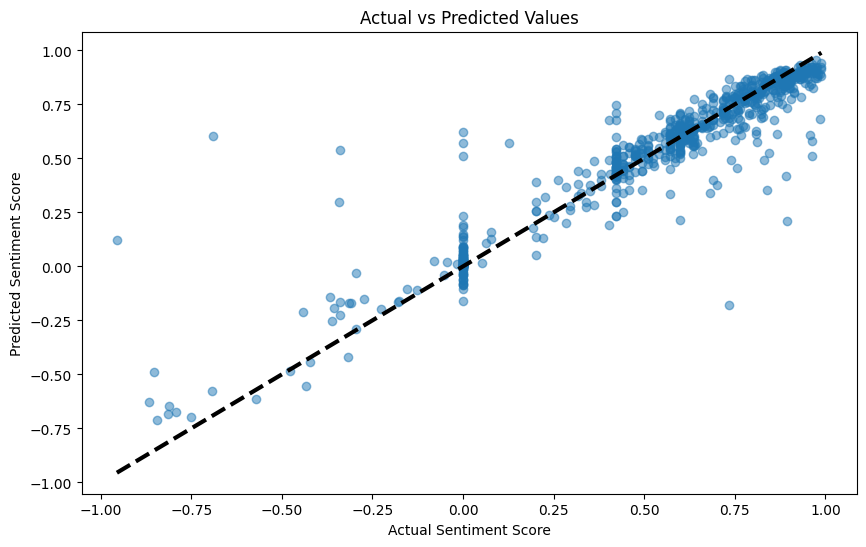

In [ ]:
X = data.drop(['Sentiment_Score'], axis=1)
y = data['Sentiment_Score']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()